<a href="https://colab.research.google.com/github/tluistorres/Cursos/blob/main/Exercicios_de_Estat%C3%ADstica_Parte_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

***
# <font color=green size=10>CURSO DE ESTATÍSTICA - PARTE 2</font>
***

# Aula 01 - Introdução

## Estatística com Python parte 2:

Probabilidade e Amostragem, o qual faz parte de uma sequência lógica sobre este tema.

No primeiro curso, começamos a falar de estatísticas descritivas e de coisas mais básicas, mas agora evoluiremos um pouco mais; conheceremos algumas Distribuições de Probabilidade e aprenderemos a calculá-las, como a distribuição binomial, a distribuição Poisson e a famosa distribuição normal.

Também falaremos um pouco sobre o conceito de Amostragem, e calcularemos e obteremos uma amostra aleatória simples utilizando recursos do Pandas.

Abordaremos técnicas de Amostragem, e depois passaremos para Estimação ainda no universo de inferência estatística, onde veremos estimações pontuais e intervalares.

Aprenderemos a calcular o tamanho de amostra para obtermos amostras representativas da população que estamos estudando.

Falaremos de erro inferencial, nível de confiança, nível de significância, teorema do limite central e todos esses conceitos importantes em Estatística pra termos uma bagagem sólida para avançarmos mais ainda, chegando em teste, regressão linear e etc.

# <font color=green>1 CONHECENDO OS DADOS</font>
***

## <font color=green> 1.1 Conhecendo o ambiente e o dataset<font>

Inicialmente, apresentaremos a ferramenta Colaboratory do Google conhecida como Colab, a qual é acessível por meio deste link, sendo a mesma que utilizamos no curso anterior.

Precisaremos fazer login para fazermos upload dos arquivos disponibilizados no passo anterior, do mesmo jeito que já fizemos.

Feito o download dos documentos, abriremos o Colab no navegador, iremos em "File > Upload notebook...", e escolheremos o arquivo Versão_bibliotecas.ipynb. Abrindo-o para rodarmos a célula já pronta, verificaremos as versões das bibliotecas Pandas, Numpy, Scipy e Matplotlib que utilizaremos.


In [ ]:
Versão do pandas -> 0.23.4
Versão do numpy -> 1.16.2
Versão do scipy -> 1.2.1
Versão do matplotlib -> 3.0.3

## Não funcionou

In [ ]:
import pandas as pd
import numpy as np
import scipy as sp
import matplotlib as mpl

print("Versão do pandas:", pd.__version__)
print("Versão do numpy:", np.__version__)
print("Versão do scipy:", sp.__version__)
print("Versão do matplotlib:", mpl.__version__)


Versão do pandas: 2.2.2
Versão do numpy: 2.0.2
Versão do scipy: 1.15.3
Versão do matplotlib: 3.10.0


Provavelmente sua versão será mais recente, mas se tiver algum problema enquanto estiver executando o código, poderá voltar e fazer o downgrade no Colab conforme aprendemos na primeira aula do primeiro curso de Estatística, caso haja dúvidas.

Expandiremos a aba lateral para começarmos carregando o arquivo dos dados que utilizaremos em nosso projeto; clicaremos em "upload" e escolheremos dados.csv, o qual é o mesmo dataset criado no curso anterior.

Não o utilizaremos muito neste treinamento, mas ao final teremos um notebook para executarmos um projeto de exercício usando o que aprendemos durante as aulas.

Feito o carregamento dos dados, abriremos o notebook preparado para este curso indo em "File > Upload Notebook..." novamente para escolhermos o arquivo Curso_de_Estatística_Parte_2.ipynb.

Este possui um roteiro para executarmos nossas aulas; na primeira parte, já conhecemos o mesmo dataset do curso anterior, o qual foi extraído do site oficial do IBGE e possui os dados da Pesquisa Nacional por Amostra de Domicílios de 2015 ou PNAD.

Encontraremos o link com a fonte dos dados, bem como as variáveis que vamos utilizar; renda, idade das pessoas, a altura elaborada didaticamente para estudarmos uma distribuição que se comporta de forma normal, como veremos neste treinamento. Temos também as codificações numéricas das Unidades da Federação, sexo, anos de estudo e cor ou raça.

Teremos algumas observações de tratamentos realizadas no dataset único e exclusivamente para facilitar nosso aprendizado; pois eliminamos tanto os registros de renda inválidos quanto os inexistentes ou missing, e consideramos somente as pessoas de referência que foram entrevistadas e são responsáveis pelo domicílio.

Os registros das observações são importantes para entendermos bem os resultados finais. Em seguida, importaremos o dados.csv que já deve estar carregado na aba lateral de "Files".

Na primeira célula da parte "Importando pandas e lendo o dataset do projeto", começaremos com o import de pandas como pd, da mesma forma que já conhecemos.

## <font color=green>1.1 Dataset do projeto</font>
***

In [ ]:
import pandas as pd

Armazenaremos os dados na variável dados, a qual será igual a pd.read_csv() recebendo o arquivo 'dados.csv' para o lermos.

In [ ]:
dados = pd.read_csv('dados.csv')

Após rodarmos esta célula com "Shift + Enter", exibiremos os primeiros cinco registros com head()

In [ ]:
dados.head()

,UF,Sexo,Idade,Cor,Anos de Estudo,Renda,Altura
0,11,0,23,8,12,800,1.603808
1,11,1,23,2,12,1150,1.739790
2,11,1,35,8,15,880,1.760444
3,11,0,46,2,6,3500,1.783158
4,11,1,47,8,9,150,1.690631


Já conhecemos a ferramenta e o dataset que vamos utilizar um pouco nesse curso.

A seguir, vamos colocar a mão na massa e falar das Distribuições Teóricas de Probabilidade.

### Pesquisa Nacional por Amostra de Domicílios - 2015

A **Pesquisa Nacional por Amostra de Domicílios - PNAD** investiga anualmente, de forma permanente, características gerais da população, de educação, trabalho, rendimento e habitação e outras, com periodicidade variável, de acordo com as necessidades de informação para o país, como as características sobre migração, fecundidade, nupcialidade, saúde, segurança alimentar, entre outros temas. O levantamento dessas estatísticas constitui, ao longo dos 49 anos de realização da pesquisa, um importante instrumento para formulação, validação e avaliação de políticas orientadas para o desenvolvimento socioeconômico e a melhoria das condições de vida no Brasil.

### Fonte dos Dados

https://ww2.ibge.gov.br/home/estatistica/populacao/trabalhoerendimento/pnad2015/microdados.shtm

### Variáveis utilizadas

> ### Renda
> ***

Rendimento mensal do trabalho principal para pessoas de 10 anos ou mais de idade.

> ### Idade
> ***

Idade do morador na data de referência em anos.

> ### Altura (elaboração própria)
> ***

Altura do morador em metros.

> ### UF
> ***

|Código|Descrição|
|---|---|
|11|Rondônia|
|12|Acre|
|13|Amazonas|
|14|Roraima|
|15|Pará|
|16|Amapá|
|17|Tocantins|
|21|Maranhão|
|22|Piauí|
|23|Ceará|
|24|Rio Grande do Norte|
|25|Paraíba|
|26|Pernambuco|
|27|Alagoas|
|28|Sergipe|
|29|Bahia|
|31|Minas Gerais|
|32|Espírito Santo|
|33|Rio de Janeiro|
|35|São Paulo|
|41|Paraná|
|42|Santa Catarina|
|43|Rio Grande do Sul|
|50|Mato Grosso do Sul|
|51|Mato Grosso|
|52|Goiás|
|53|Distrito Federal|

> ### Sexo
> ***

|Código|Descrição|
|---|---|
|0|Masculino|
|1|Feminino|

> ### Anos de Estudo
> ***

|Código|Descrição|
|---|---|
|1|Sem instrução e menos de 1 ano|
|2|1 ano|
|3|2 anos|
|4|3 anos|
|5|4 anos|
|6|5 anos|
|7|6 anos|
|8|7 anos|
|9|8 anos|
|10|9 anos|
|11|10 anos|
|12|11 anos|
|13|12 anos|
|14|13 anos|
|15|14 anos|
|16|15 anos ou mais|
|17|Não determinados|
||Não aplicável|

> ### Cor
> ***

|Código|Descrição|
|---|---|
|0|Indígena|
|2|Branca|
|4|Preta|
|6|Amarela|
|8|Parda|
|9|Sem declaração|

#### <font color='red'>Observação</font>
***
> Os seguintes tratamentos foram realizados nos dados originais:
> 1. Foram eliminados os registros onde a **Renda** era inválida (999 999 999 999);
> 2. Foram eliminados os registros onde a **Renda** era missing;
> 3. Foram considerados somente os registros das **Pessoas de Referência** de cada domicílio (responsável pelo domicílio).

### Importando pandas e lendo o dataset do projeto

https://pandas.pydata.org/

In [ ]:
import pandas as pd

In [ ]:
dados = pd.read_csv('dados.csv')

In [ ]:
dados.head()

,UF,Sexo,Idade,Cor,Anos de Estudo,Renda,Altura
0,11,0,23,8,12,800,1.603808
1,11,1,23,2,12,1150,1.739790
2,11,1,35,8,15,880,1.760444
3,11,0,46,2,6,3500,1.783158
4,11,1,47,8,9,150,1.690631


# Distribuição binomial

Iniciaremos de fato nosso curso abordando as Distribuições Teóricas de Probabilidade.

Quando avaliamos a forma como a variável aleatória se distribui, conseguimos definir diferentes tipos de Distribuições de Frequência ou de Probabilidade, como vimos no curso anterior a este.

Neste primeiro passo, falaremos sobre as três importantes que são muito utilizadas em estatística: Binomial, a Poisson e a famosa Normal.

Começaremos lidando com alguns problemas, e depois tentaremos encaixá-los nas Distribuições para solucioná-los.

Um Evento Binomial é caracterizado pela possibilidade de ocorrência de apenas duas categorias; ou é sim ou é não, verdadeiro e falso, sucesso ou fracasso e etc.

A soma dessas duas categorias é o Espaço Amostral, ou seja, o total de eventos possíveis dentro de um experimento.

Por exemplo, o lançamento de uma moeda pode ter a face "cara" ou a "coroa", e esse é o Espaço Amostral com duas possibilidades.

Em outro exemplo de um lançamento de dado de seis faces, só poderemos ter seis resultados possíveis: 1, 2, 3, 4, 5, ou 6.

Na fórmula, teremos a probabilidade de ocorrer k representada por P vezes k, o qual é um número de eventos desejados que tenham sucesso.

---
---

# <font color=green>2 DISTRIBUIÇÕES DE PROBABILIDADE</font>
***

## <font color=red>Problema</font>
***

Em um concurso para preencher uma vaga de cientista de dados temos um total de **10 questões** de múltipla escolha com **3 alternativas possíveis** em cada questão. **Cada questão tem o mesmo valor.** Suponha que um candidato resolva se aventurar sem ter estudado absolutamente nada. Ele resolve fazer a prova de olhos vendados e chutar todas as resposta. Assumindo que a prova **vale 10 pontos e a nota de corte seja 5**, obtenha a probabilidade deste candidato **acertar 5 questões** e também a probabilidade deste candidato **passar para a próxima etapa do processo seletivo**.

## <font color=green>2.1 Distribuição Binomial</font>
***

Um evento **binomial** é caracterizado pela possibilidade de ocorrência de apenas duas categorias. Estas categorias somadas representam todo o espaço amostral, sendo também mutuamente excludentes, ou seja, a ocorrência de uma implica na não ocorrência da outra.

Em análises estatísticas o uso mais comum da distribuição binomial é na solução de problemas que envolvem situações de **sucesso** e **fracasso**.

# $$P(k)=\binom{n}{k} p^k q^{n-k}$$

Onde:

$p$ = probabilidade de sucesso

$q = (1 - p)$ = probabilidade de fracasso

$n$ = número de eventos estudados

$k$ = número de eventos desejados que tenham sucesso

### Experimento Binomial

1. Realização de $n$ ensaios idênticos.

2. Os ensaios são independentes.

3. Somente dois resultados são possíveis, exemplo: Verdadeiro ou falso; Cara ou coroa; Sucesso ou fracasso.

4. A probabilidade de sucesso é representada por $p$ e a de fracasso por $1-p=q$. Estas probabilidades não se modificam de ensaio para ensaio.

O n sobre k entre parênteses é a combinação de n combinados de k em k, o que é um método matemático bem simples de resolver, e temos um método no Python que fará este cálculo. Mais adiante, teremos p da probabilidade de sucesso elevado a k.

Por exemplo, se estivermos estudando o número de "caras" que ocorrem no lançamento de uma moeda, queremos saber a probabilidade de ocorrer esta face, que obviamente seria de 50% por haver somente duas situações possíveis.

Já o elemento q é igual a 1 menos p representando a probabilidade de fracasso. No caso da moeda, seria a probabilidade de obter "coroa" de 50% também.

A soma das probabilidades p mais q será igual a 1 ou 100%, e o resultado variará de 0 a 1 dependendo do caso.

Por fim, n é o número de eventos estudados. Em nosso exemplo das 80 questões em uma prova cuja nota máxima é 10 e a nota de corte é 5, o candidato deverá acertar pelo menos 40 questões, ou seja, a metade que corresponde à nota de corte.

Com isso, o n seria 80 e o k seria 40 para o número de eventos mínimos necessários para o candidato ter sucesso.

O Experimento Binomial tem etapas que o caracterizam, e se as seguirmos, conseguiremos identificar se o problema pode ser resolvido utilizando Distribuição Binomial ou não.

Primeiro, faremos a realização de n ensaios idênticos, como quando jogamos uma moeda; a chance de cair "cara" é de 50% e a "coroa" de 50% também, e isso acontecerá da mesma maneira nos demais lançamentos.

Os ensaios também são independentes entre si, e temos somente dois resultados possíveis como já falamos.

A probabilidade de sucesso é representado por p e a de fracasso por q igual a 1 menos p, e não se modificam de ensaio para ensaio em nosso caso, mas claro que há situações em que isso não ocorrerá.



### Média da distribuição binomial

O valor esperado ou a média da distribuição binomial é igual ao número de experimentos realizados multiplicado pela chance de ocorrência do evento.

# $$\mu = n \times p$$

### Desvio padrão da distribuição binomial

O desvio padrão é o produto entre o número de experimentos, a probabilidade de sucesso e a probabilidade de fracasso.

# $$\sigma = \sqrt{n \times p \times q}$$

Já a média da Distribuição Binomial é representado por μ igual a n vezes p e o Desvio Padrão por σ igual a raiz quadrada de n vezes p vezes q.

De volta ao notebook, teremos a parte "Importando bibliotecas" onde deveremos importar o comb da biblioteca sipy.special para podermos calcular a combinação de n de k a k representada por Cnk ou n sobre k entre parênteses.

### Importando bibliotecas
https://docs.scipy.org/doc/scipy/reference/generated/scipy.special.comb.html

In [ ]:
from scipy.special import comb

Nesta parte, também encontraremos um [link com a documentação do Scipy](https://), contendo informações sobre a funcionalidade comb() que utilizaremos, a qual é justamente o método que resolverá a combinação.

### Combinações

Número de combinações de $n$ objetos, tomados $k$ a cada vez, é:

# $$C_{k}^{n} = \binom{n}{k} = \frac{n!}{k!(n - k)!}$$

Onde

## $$n! = n\times(n-1)\times(n-2)\times...\times(2)\times(1)$$
## $$k! = k\times(k-1)\times(k-2)\times...\times(2)\times(1)$$

Por definição

## $$0! = 1$$

## <font color='green'>Exemplo: Mega Sena</font>

Em um exemplo prático bem simples da loteria Mega Sena que tem 60 números, descobriremos a probabilidade de ganhar este prêmio. Já que temos um total de 1 a 60 números para escolher onde a aposta mínima é 6 números, deveremos descobrir o Espaço Amostral e as possibilidades por meio da Combinação.

Temos apenas uma chance de ganhar na Mega Sena, e precisamos calcular "1" dividido pelo Espaço Amostral, o qual é justamente a combinação de 60 números de 6 em 6.

Usando o Python, aplicaremos a operação na parte "Exemplo: Mega Sena" de nosso notebook. Na primeira célula, criaremos a variável combinacoes sendo igual a comb() recebendo os valores 60 e 6. Para recebermos os resultados, chamaremos apenas combinacoes em seguida.

Em um volante de loteria da Mega Sena temos um total de **60 números** para escolher onde a aposta mínima é de **seis números**. Você que é curiosa(o) resolve calcular a probabilidade de se acertar na Mega Sena com apenas **um jogo**. Para isso precisamos saber quantas **combinações de seis números podem ser formadas com os 60 números disponíveis**.

### $$C_{6}^{60} = \binom{60}{6} = \frac{60!}{6!(60 - 6)!}$$

In [ ]:
combinacoes = comb(60, 6)
combinacoes

np.float64(50063860.0)

In [ ]:
probabilidade = 1 / combinacoes
probabilidade

np.float64(1.997448858318156e-08)

In [ ]:
probabilidade = 1 / combinacoes
print('%0.15f' % probabilidade)

0.000000019974489


Portanto, a chance de ganharmos na Mega Sena é bem pequena, cerca de 0,0000000199%. Aplicando à fórmula, teremos a combinação de 60 de seis em seis números, sendo igual a 60 fatorial OU 60! dividido por 6 fatorial que é multiplicado pela subtração fatorial de 60 menos 6.

A seguir, pegaremos o problema que começamos e o resolveremos utilizando a distribuição binomial.

## <font color='green'>Exemplo: Concurso para cientista de dados</font>

Em um concurso para preencher uma vaga de cientista de dados temos um total de **10 questões** de múltipla escolha com **3 alternativas possíveis** em cada questão. **Cada questão tem o mesmo valor.** Suponha que um candidato resolva se aventurar sem ter estudado absolutamente nada. Ele resolve fazer a prova de olhos vendados e chutar todas as resposta. Assumindo que a prova **vale 10 pontos e a nota de corte seja 5**, obtenha a probabilidade deste candidato **acertar 5 questões** e também a probabilidade deste candidato **passar para a próxima etapa do processo seletivo**.

No passo anterior, recebemos um problema sobre um processo seletivo para uma vaga de trabalho para Cientista de Dados. Neste passo, tentaremos algumas alternativas para resolvê-lo usando a Distribuição Binomial.

Na prova deste concurso, temos um total de 10 questões de múltipla escolha com 3 alternativas cada. Cada questão tem o mesmo valor, e suporemos que um candidato fez o teste chutando todas as perguntas de forma aleatória, pois não estudou absolutamente nada.

Assumindo que a prova vale 10 pontos e 5 seja a nota de corte, ou seja, uma nota maior a 5 significará aprovação e menor que 5 reprovação, tentaremos descobrir qual a probabilidade do candidato acertar 5 pontos, e de acertar mais que isso e passar para a próxima etapa do processo seletivo, o que são perguntas diferentes.

Começaremos pelo primeiro desafio, e a primeira coisa é tentar identificar se este experimento de fato se adequa a uma Distribuição Binomial.

Temos 10 questões de múltipla escolha com 3 alternativas cada, ou seja, são ensaios idênticos. Então conseguimos identificar n como 10 e também podemos dizer que são independentes entre si, pois a opção escolhida aleatoriamente em cada questão não influencia em nada na outra.

Em seguida, teremos que descobrir se somente dois resultados são possíveis em cada ensaio; dentre as três alternativas de cada questão, somente uma é correta, e o candidato pode acertar a questão ou não. Ou seja, cada ensaio tem somente as duas possibilidades de acerto ou de erro, o que é justamente o que precisamos saber.

Portanto, estamos realmente diante de um Experimento Binomial, e só falta definirmos as probabilidades de sucesso e de fracasso, bem como verificar se estas se repetem em cada experimento.

Para calcularmos a probabilidade de acerto representada por p, começaremos criando uma variável a numero_de_alternativas_por_questao sendo igual a 3 na parte "Qual a probabilidade de sucesso (p)?" de nosso notebook.

Na linha seguinte, p será igual a 1 dividido pela última variável. Em seguida, chamaremos apenas p para vermos o resultado.

### Qual o número de ensaios ($n$)?

In [ ]:
n = 10
n

10

### Os ensaios são independentes?

Sim. A opção escolhida em uma questão não influencia em nada a opção escolhida em outra questão.

### Somente dois resultados são possíveis em cada ensaio?

Sim. O candidato tem duas possibilidades, ACERTA ou ERRAR uma questão.

### Qual a probabilidade de sucesso ($p$)?

Para calcularmos a probabilidade de acerto representada por p, começaremos criando uma variável a numero_de_alternativas_por_questao sendo igual a 3 na parte "Qual a probabilidade de sucesso (p)?" de nosso notebook.

Na linha seguinte, p será igual a 1 dividido pela última variável. Em seguida, chamaremos apenas p para vermos o resultado.

In [ ]:
numero_de_alternativas_por_questao = 3
p = 1 / numero_de_alternativas_por_questao
p

0.3333333333333333

Com a execução, conseguiremos definir que p é aproximadamente 0,333.

Na célula seguinte, a probabilidade de fracasso representada por q será igual a 1 menos p, como já vimos anteriormente.

### Qual a probabilidade de fracasso ($q$)?

In [ ]:
q = 1 - p
q

0.6666666666666667

Feito isso, receberemos o resultado aproximado de 0,6666.

Essas duas probabilidade não vão se alterar, pois logicamente não há diferenças entre as questões com 3 alternativas cada, então estamos diante de um experimento em que conseguimos resolver utilizando a Distribuição Binomial.

O único ponto que falta da nossa formula é achar o número de eventos desejados que tenham sucesso.

Para descobrirmos isso em nosso problema, deveremos pensar um pouco mais porque não está explícito; temos 10 experimentos de mesmo valor em uma prova que vale 10 pontos, e se o candidato acertar metade da prova, terá sucesso e caso contrário obterá reprovação.

Logo, queremos saber a chance desta pessoa acertar os 5 pontos da nota de corte escolhendo as alternativas aleatoriamente.

Os eventos em que desejamos obter sucesso serão representados pela variável k na célula da parte seguinte do notebook, a qual será igual a 5 relativa à nota de corte. Com isso, já teremos todos os elementos da fórmula.

Veremos como solucionar manualmente aplicando a fórmula de Probabilidade por meio da variável probabilidade.

Esta será igual a comb() recebendo n e k entre parênteses como primeiro item da fórmula.

Isso será multiplicado por p elevado a k, operação esta representada por dois asteriscos seguidos ** também entre parênteses para separarmos as partes da fórmula.

Em seguida, teremos q elevado a n menos k. Por fim, imprimiremos a probabilidade em porcentagem com oito casas decimais.

### Qual o total de eventos que se deseja obter sucesso ($k$)?

In [ ]:
k = 5
k

5

### Solução 1

In [ ]:
probabilidade = (comb(n, k)) * (p ** k) * (q ** (n - k))
print('%0.8f' % probabilidade)

0.13656455


Como retorno, receberemos o resultado 0.13656455 de probabilidade do candidato acertar os cinco pontos da prova.

Veremos a segunda maneira de realizarmos o mesmo cálculo de forma mais simples utilizando Python. O primeiro passo é importar binom da biblioteca scipy.stats.

Também encontraremos o link para acessar sua documentação e tirarmos qualquer dúvida.


### Importando bibliotecas
https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.binom.html

In [ ]:
from scipy.stats import binom

Na parte "Solução 2" de nosso notebook, digitaremos a variável probabilidade sendo igual a binom com o método .pmf() relativo à probability mais function recebendo os parâmetros k, n, p da fórmula.

Em seguida, formataremos o resultado da mesma maneira que fizemos anteriormente.

### Solução 2

In [ ]:
probabilidade = binom.pmf(k, n, p)
print('%0.8f' % probabilidade)

0.13656455


Com isso, receberemos o mesmo resultado obtido da maneira manual.

Portanto, precisamos ter o k, o n e o p no método para calcular tudo isso.

Além da probabilidade do candidato tirar a nota mínima para passar no processo seletivo, deveremos também obter as probabilidades do candidato passar tirando notas maiores do que 5, como as notas 6, 7, 8, 9 ou até mesmo 10.

Na parte "Obter a probabilidade do candidato passar" de nosso notebook, digitaremos na primeira célula binom.pmf() recebendo 5, n e p, depois somaremos com o mesmo método com k sendo 6, depois 7 e assim por diante até 10.


### Obter a probabilidade do candidato passar

### $$P(acertar \geq 5) = P(5) + P(6) + P(7) + P(8) + P(9) + P10)$$

In [ ]:
binom.pmf(5, n, p) + binom.pmf(6, n, p) + binom.pmf(7, n, p) + binom.pmf(8, n, p) + binom.pmf(9, n, p) + binom.pmf(10, n, p)

np.float64(0.21312808006909476)

Como retorno, receberemos o valor de aproximadamente 0.21 relativa à probabilidade do candidato passar na prova.

Porém, esta não é a maneira mais interessante de fazer o cálculo; na célula seguinte, usaremos os mesmos argumentos, mas ao invés de passarmos k, poderemos passar uma lista com todos os itens que queremos, ou seja, [5, 6, 7, 8, 9, 10].

Ao final, o método fará o cálculo para cada uma das notas. Aplicando o método .sum() ao final do código, faremos a somatória e rodaremos a célula.

In [ ]:
binom.pmf([5, 6, 7, 8, 9, 10], n, p).sum()

np.float64(0.21312808006909476)

O resultado será o mesmo do anterior, mas o código está bem mais simples.

Dentro de binom, temos as funções .cdf() e .sf(). A primeira é cumulativa, e receberá os parâmetros 4, n, p.

In [ ]:
1 - binom.cdf(4, n, p)

np.float64(0.21312808006909523)

Este método está calculando e somando as probabilidades do candidato obter 1, 2, 3 e 4 pontos.

Porém, queremos justamente o contrário dos pontos para que possa ter sucesso. Logo, os subtrairemos de 1 para obtermos o mesmo resultado de aproximado de 0.21.

Já na célula seguinte, o método .sf() faz exatamente isso recebendo os mesmos parâmetros, sem a subtração.

In [ ]:
binom.sf(4, n, p)

np.float64(0.21312808006909525)

Esses cálculos responderiam à pergunta de qual seria a probabilidade do candidato conseguir pelo menos a nota de corte 5.

A seguir, falaremos sobre a média da Distribuição Binomial na parte "Exemplo: Gincana" do notebook.

## <font color='green'>Exemplo: Gincana</font>

Uma cidade do interior realiza todos os anos uma gincana para arrecadar fundos para o hospital da cidade. Na última gincana se sabe que a **proporção de participantes do sexo feminino foi de 60%**. **O total de equipes, com 12 integrantes, inscritas na gincana deste ano é de 30**. Com as informações acima responda: Quantas equipes deverão ser formadas por **8 mulheres**?

### Solução

In [ ]:
p = 0.6
p

0.6

In [ ]:
n = 12
n

12

In [ ]:
k = 8
k

8

In [ ]:
probabilidade = binom.pmf(k, n, p)
print('%0.8f' % probabilidade)

0.21284094


In [ ]:
equipes = 30 * probabilidade
equipes

6.385228185599988

## Aplicação da média

Neste passo, usaremos o conceito de média da Distribuição Binomial em um novo problema como exercício.

Temos uma cidade do interior que realiza todos os anos uma gincana para arrecadar fundos para o hospital da cidade. Na última, a proporção de participantes do sexo feminino foi de 60% e o total foi de 30 equipes com 12 integrantes cada uma.

Com as informações acima, deveremos responder quantas equipes são formadas por 8 mulheres.

Então teremos que dividir esse experimento em duas partes; primeiro, descobriremos qual a probabilidade de uma equipe ser formada por 8 mulheres e 4 homens, e então calcularemos quantas das 30 equipes são formadas por 8 mulheres em média.

Nesta situação, o Experimento Binomial está na seleção de pessoas para compor a equipe, que podem ser homens ou mulheres.

Com uma proporção de 60% de participantes femininas e 40% masculinos por consequência, a chance de selecionarmos aleatoriamente alguma mulher é um pouco maior do que um homem, e teremos que realizar isso 12 vezes que é o número de integrantes.

De volta ao nosso notebook na parte "Exemplo: Gincana", a probabilidade de sucesso no caso das mulheres é de 60%, ou seja, p seria 0,6, enquanto n seria as 12 vezes do experimento binomial onde selecionamos alguém para as equipes.

Dentre as 30 equipes de 12 integrantes, descobriremos qual a chance de termos 8 mulheres e 4 homens.

Para isso, eu tenho um k igual a probabilidade de termos 8 mulheres em uma equipe.

Digitaremos os elementos nas células e as rodaremos.

In [ ]:
p = 0.6

In [ ]:
n = 12

In [ ]:
k = 8

Com isso, teremos todos os elementos suficientes para aplicar a fórmula estudada no passo anterior. Poderemos copiá-la e colá-la na célula seguinte.

In [ ]:
probabilidade = binom.pmf(k, n, p)
print('%0.8f' % probabilidade)

0.21284094


Com esta execução, teremos a chance de aproximadamente 21.28% de uma equipe ser selecionada com 8 mulheres e 4 homens.

Porém, queremos saber quantas dessas 30 equipes serão formadas com esta configuração, então n passará a ser 30.

Para isso, usaremos o conceito da Média de Distribuição Binomial, cuja fórmula é μ igual a n vezes esta probabilidade p de termos 8 mulheres na equipe.

Dentro da variável equipes na célula seguinte, digitaremos 30 multiplicado pela variável probabilidade.

In [ ]:
equipes = 30 * probabilidade
equipes

np.float64(6.3852281856)

---
---

Como retorno, teremos o número aproximado de 6,38 equipes como a média. Porém, como logicamente estas devem ser representadas em números inteiros, poderemos arredondar sem problemas para darmos a resposta à questão da gincana.

A seguir, abordaremos outras Distribuições de Probabilidade.

## <font color=red>Problema</font>
***

Um restaurante recebe em média **20 pedidos por hora**. Qual a chance de que, em determinada hora escolhida ao acaso, o restaurante receba **15 pedidos**?

## <font color=green>2.2 Distribuição Poisson</font>
***

Continuando com as Distribuições de Probabilidade, encontraremos mais um novo problema para resolvermos.

Um restaurante recebe em média 20 pedidos por hora, e deveremos descobrir qual a chance do restaurante receber 15 pedidos em uma determinada hora escolhida ao acaso.

Conseguiremos resolvera questão utilizando a Distribuição de Probabilidade Poisson.

Na parte "2.2 Distribuição Poisson" do notebook, encontraremos um texto para consultarmos no futuro caso queiramos entender melhor seu funcionamento, sua fórmula e seus componentes específicos.

Essa Distribuição é empregada para descrever número de ocorrências em um intervalo de tempo ou espaço específico, que nos permite contabilizar o sucesso, mas é impossível contar os fracassos, por exemplo.

Em um rápido exemplo de aplicação da Poisson, temos 1 quilometro de estrada em que conseguimos contabilizar o número de buracos neste trecho, mas não podemos contar o número de não-buracos.

Em um período de uma hora, podemos contabilizar quantas pessoas entraram em determinada loja do shopping, mas não podemos contar as pessoas que não entraram.

Calcularemos com base nesta fórmula:

É empregada para descrever o número de ocorrências em um intervalo de tempo ou espaço específico. Os eventos são caracterizados pela possibilidade de contagem dos sucessos, mas a não possibilidade de contagem dos fracassos.

Como exemplos de processos onde podemos aplicar a distribuição de Poisson temos a determinação do número de clientes que entram em uma loja em determinada hora, o número de carros que chegam em um drive-thru de uma lanchonete na hora do almoço, a determinação do número de acidentes registrados em um trecho de estrada etc.

# $$P(k) = \frac{e^{-\mu}(\mu)^k}{k!}$$

Onde:

$e$ = constante cujo valor aproximado é 2,718281828459045

$\mu$ = representa o número médio de ocorrências em um determinado intervalo de tempo ou espaço

$k$ = número de sucessos no intervalo desejado

### Experimento Poisson

1. A probabilidade de uma ocorrência é a mesma em todo o intervalo observado.

2. O número de ocorrências em determinado intervalo é independente do número de ocorrências em outros intervalos.

3. A probabilidade de uma ocorrência é a mesma em intervalos de igual comprimento.

### Média da distribuição Poisson

# $$\mu$$

### Desvio padrão da distribuição Poisson

# $$\sigma = \sqrt{\mu}$$

Nesta, temos a probabilidade p com k sendo o número de sucesso no intervalo desejado, ou seja, tempo e espaço como vimos anteriormente.

O elemento e é a constante matemática número de Euler, e representado pelo valor aproximado 2,718281828459045.

Veremos como obteremos este número utilizando especificamente o NumPy.

Já o µ representa a Média da Distribuição Poisson com o número médio de ocorrências em um determinado intervalo de tempo ou espaço, e às vezes µ precisa ser calculado dependendo do problema a ser resolvido.

O Experimento Poisson tem as características similares ao Binomial, pois a probabilidade de ocorrência é igual em todo o intervalo observado.

O número de ocorrências em determinado intervalo é independente do número de ocorrências em outros intervalos; essa independência é importante, pois a probabilidade de uma ocorrência é a mesma em intervalos de igual comprimento, ou em determinada hora, ou de uma pessoa entrar no shopping e etc.

Por fim, o desvio padrão é a raiz quadrada do µ.

Primeiro, importaremos o numpy como np usando as. Com isso, traremos o número de Euler, constantes matemáticas, número neperiano e etc.

### Importando bibliotecas

http://www.numpy.org/

In [ ]:
import numpy as np

In [ ]:
np.e

2.718281828459045

Com isso, receberemos o valor aproximado de 2,718281828459045.

A seguir, resolveremos o problema apresentado no começo da aula utilizando a distribuição de Poisson.

## <font color='grees'>Exemplo: Delivery</font>

Um restaurante recebe em média **20 pedidos por hora**. Qual a chance de que, em determinada hora escolhida ao acaso, o restaurante receba **15 pedidos**?

Para isso, aplicaremos a fórmula de Poisson, em que será possível identificarmos e contabilizarmos os sucessos.

Já sabemos quantos pedidos o restaurante recebe, mas não conseguimos contabilizar quantos pedidos não recebe, pois não faz sentido nesta situação. Isso caracteriza muito a aplicação de uma Distribuição Poisson.

A primeira pergunta sobre qual o número médio de ocorrências por hora representado pelo µ da fórmula será armazenada na variável media.

Esta informação já está no problema; o restaurante recebe, em média, 20 pedidos num período de uma hora. Logo, isso é o número de ocorrências em determinado período de tempo ou espaço, então media será igual a 20.

### Qual o número médio de ocorrências por hora ($\mu$)?

In [ ]:
media = 20
media

20

Em seguida, o número de ocorrências que queremos obter no período será o k da fórmula, ou seja, a chance do restaurante receber 15 pedidos em uma hora aleatória do dia. Portanto, k será igual a 15.

### Qual o número de ocorrências que queremos obter no período ($k$)?

In [ ]:
k = 15
k

15

Faremos uma solução manual na parte "Solução 1", e na "Solução 2" usaremos os recursos do Python de forma mais simples, da mesma maneira que realizamos anteriormente na Distribuição Binomial.

A variável probabilidade será igual às três partes da fórmula separadas por parênteses para começarmos.

In [ ]:
probabilidade = () * () / ()

A primeira parte será e elevado a -media com uso de dois asteriscos ** e parênteses, e já vimos como obter essa constante matemática com np.e.

Na segunda parte da fórmula, teremos a média elevada a k. Em seguida, englobaremos até este trecho entre parênteses novamente para não confundirmos com a divisão pelo k!.

O numpy também tem essa função matemática para calcular o k fatorial, lembrando que é um produtório de uma contagem regressiva como já sabemos. Então usaremos o método np.math.factorial() recebendo o k.

Por fim, exibiremos o resultado da probabilidade com o print() de '%o.8f' para formatarmos melhor.

### Solução 1

In [ ]:
import math
import numpy as np

In [ ]:

probabilidade = ((np.exp(-media)) * (media ** k)) / math.factorial(k)
print('%0.8f' % probabilidade)

0.05164885


Rodando a célula da "Solução 1", teremos a probabilidade de 0.05164885, ou seja, a chance é de aproximadamente 5.16% do restaurante receber 15 pedidos em determinada hora escolhida ao acaso.

Já na parte "Solução 2", veremos uma forma mais simples de calcular usando Python, mas antes encontraremos um link com a documentação de scipy.stats.poisson.

Importaremos poisson a partir da biblioteca scipy.stats na primeira célula.

### Importando bibliotecas

https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.poisson.html

### Solução 2

Em seguinte na mesma célula, chamaremos a probabilidade sendo igual a poisson com o método pmf() recebendo os parâmetros k e a media.

Por fim, copiaremos a mesma formatação do print() para exibirmos o resultado em porcentagem.

In [ ]:
from scipy.stats import poisson

probabilidade = poisson.pmf(k, media)
print('%0.8f' % probabilidade)

0.05164885


Com isso, teremos o mesmo valor 0.05164885 que obtivemos antes, porém de forma bem mais simples.

Portanto, a probabilidade é de 5.16% do restaurante receber 15 pedidos em determinada hora escolhida ao acaso, dado que em média recebe 20 por hora.

Talvez não utilizemos exatamente isso em nosso dataset no projeto final, até porque nem tudo que estamos aprendendo tem a ver com um possível projeto que estejamos executando, pois não usaremos todo o ferramental estatístico para resolvermos determinado assunto.

De qualquer maneira, é importante termos essa base, afinal problemas desse tipo surgem e já teremos essa bagagem para resolvê-los.

A seguir, começaremos com a Distribuição Normal.

---
---

## <font color=red>Problema</font>
***

Em um estudo sobre as alturas dos moradores de uma cidade verificou-se que o conjunto de dados segue uma **distribuição aproximadamente normal**, com **média 1,70** e **desvio padrão de 0,1**. Com estas informações obtenha o seguinte conjunto de probabilidades:

> **A.** probabilidade de uma pessoa, selecionada ao acaso, ter menos de 1,80 metros.

> **B.** probabilidade de uma pessoa, selecionada ao acaso, ter entre 1,60 metros e 1,80 metros.    

> **C.** probabilidade de uma pessoa, selecionada ao acaso, ter mais de 1,90 metros.

## <font color=green>2.3 Distribuição Normal</font>
***

A distribuição normal é uma das mais utilizadas em estatística. É uma distribuição contínua, onde a distribuição de frequências de uma variável quantitativa apresenta a forma de sino e é simétrica em relação a sua média.

![Normal](https://caelum-online-public.s3.amazonaws.com/1178-estatistica-parte2/01/img001.png)

### Características importantes

1. É simétrica em torno da média;

2. A área sob a curva corresponde à proporção 1 ou 100%;

3. As medidas de tendência central (média, mediana e moda) apresentam o mesmo valor;

4. Os extremos da curva tendem ao infinito em ambas as direções e, teoricamente, jamais tocam o eixo $x$;

5. O desvio padrão define o achatamento e largura da distribuição. Curvas mais largas e mais achatadas apresentam valores maiores de desvio padrão;

6. A distribuição é definida por sua média e desvio padrão;

7. A probabilidade sempre será igual à área sob a curva, delimitada pelos limites inferior e superior.

# $$f(x) = \frac{1}{\sqrt{2\pi\sigma}}e^{-\frac{1}{2}\left(\frac{x-\mu}{\sigma}\right)^2}$$

Onde:

$x$ = variável normal

$\sigma$ = desvio padrão

$\mu$ = média

A probabilidade é obtida a partir da área sob a curva, delimitada pelos limites inferior e superior especificados. Um exemplo pode ser visto na figura abaixo.

![alt text](https://caelum-online-public.s3.amazonaws.com/1178-estatistica-parte2/01/img002.png)


Para obter a área acima basta calcular a integral da função para os intervalos determinados. Conforme equação abaixo:

# $$P(L_i<x<L_s) = \int_{L_i}^{L_s}\frac{1}{\sqrt{2\pi\sigma}}e^{-\frac{1}{2}\left(\frac{x-\mu}{\sigma}\right)^2}$$

Onde:

$x$ = variável normal

$\sigma$ = desvio padrão

$\mu$ = média

$L_i$ = limite inferior

$L_s$ = limite superior

### Tabelas padronizadas

As tabelas padronizadas foram criadas para facilitar a obtenção dos valores das áreas sob a curva normal e eliminar a necessidade de solucionar integrais definidas.

Para consultarmos os valores em uma tabela padronizada basta transformarmos nossa variável em uma variável padronizada $Z$.

Esta variável $Z$ representa o afastamento em desvios padrões de um valor da variável original em relação à média.

# $$Z = \frac{x-\mu}{\sigma}$$

Onde:

$x$ = variável normal com média $\mu$ e desvio padrão $\sigma$

$\sigma$ = desvio padrão

$\mu$ = média

### Construindo tabela normal padronizada
https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.norm.html

In [ ]:
import pandas as pd
import numpy as np
from scipy.stats import norm

tabela_normal_padronizada = pd.DataFrame(
    [],
    index=["{0:0.2f}".format(i / 100) for i in range(0, 400, 10)],
    columns = ["{0:0.2f}".format(i / 100) for i in range(0, 10)])

for index in tabela_normal_padronizada.index:
    for column in tabela_normal_padronizada.columns:
        Z = np.round(float(index) + float(column), 2)
        tabela_normal_padronizada.loc[index, column] = "{0:0.4f}".format(norm.cdf(Z))

tabela_normal_padronizada.rename_axis('Z', axis = 'columns', inplace = True)

tabela_normal_padronizada

Z,0.00,0.01,0.02,0.03,0.04,0.05,0.06,0.07,0.08,0.09
0.00,0.5000,0.5040,0.5080,0.5120,0.5160,0.5199,0.5239,0.5279,0.5319,0.5359
0.10,0.5398,0.5438,0.5478,0.5517,0.5557,0.5596,0.5636,0.5675,0.5714,0.5753
0.20,0.5793,0.5832,0.5871,0.5910,0.5948,0.5987,0.6026,0.6064,0.6103,0.6141
0.30,0.6179,0.6217,0.6255,0.6293,0.6331,0.6368,0.6406,0.6443,0.6480,0.6517
0.40,0.6554,0.6591,0.6628,0.6664,0.6700,0.6736,0.6772,0.6808,0.6844,0.6879
0.50,0.6915,0.6950,0.6985,0.7019,0.7054,0.7088,0.7123,0.7157,0.7190,0.7224
0.60,0.7257,0.7291,0.7324,0.7357,0.7389,0.7422,0.7454,0.7486,0.7517,0.7549
0.70,0.7580,0.7611,0.7642,0.7673,0.7704,0.7734,0.7764,0.7794,0.7823,0.7852
0.80,0.7881,0.7910,0.7939,0.7967,0.7995,0.8023,0.8051,0.8078,0.8106,0.8133
0.90,0.8159,0.8186,0.8212,0.8238,0.8264,0.8289,0.8315,0.8340,0.8365,0.8389


<img src='https://caelum-online-public.s3.amazonaws.com/1178-estatistica-parte2/01/img003.png' width='250px'>

A tabela acima fornece a área sob a curva entre $-\infty$ e $Z$ desvios padrão acima da média. Lembrando que por se tratar de valores padronizados temos $\mu = 0$.

## <font color='blue'>Exemplo: Qual sua altura?</font>

Em um estudo sobre as alturas dos moradores de uma cidade verificou-se que o conjunto de dados segue uma **distribuição aproximadamente normal**, com **média 1,70** e **desvio padrão de 0,1**. Com estas informações obtenha o seguinte conjunto de probabilidades:

> **A.** probabilidade de uma pessoa, selecionada ao acaso, ter menos de 1,80 metros.

> **B.** probabilidade de uma pessoa, selecionada ao acaso, ter entre 1,60 metros e 1,80 metros.    

> **C.** probabilidade de uma pessoa, selecionada ao acaso, ter mais de 1,90 metros.

### Problema A - Identificação da área sob a curva

<img style='float: left' src='https://caelum-online-public.s3.amazonaws.com/1178-estatistica-parte2/01/img004.png' width='350px'>

### Obter a variável padronizada $Z$

In [ ]:
media = 1.7
media

1.7

In [ ]:
desvio_padrao = 0.1
desvio_padrao

0.1

In [ ]:
Z = (1.8 - media) / desvio_padrao
Z

1.0000000000000009

### Solução 1 - Utilizando tabela

In [ ]:
probabilidade = 0.8413
probabilidade

0.8413

### Solução 2 - Utilizando Scipy

In [ ]:
from scipy.stats import norm
norm.cdf(Z)

0.8413447460685431

### Problema B - Identificação da área sob a curva

<img style='float: left' src='https://caelum-online-public.s3.amazonaws.com/1178-estatistica-parte2/01/img005.png' width='350px'>

### Obter a variável padronizada $Z$

In [ ]:
Z_inferior = (1.6 - media) / desvio_padrao
round(Z_inferior, 2)

-1.0

In [ ]:
Z_superior = (1.8 - media) / desvio_padrao
round(Z_superior, 2)

1.0

### Solução 1 - Utilizando tabela

In [ ]:
probabilidade = (0.8413 - 0.5) * 2
probabilidade

0.6826000000000001

In [ ]:
probabilidade = 0.8413 - (1 - 0.8413)
probabilidade

0.6826000000000001

### Solução 2 - Utilizando Scipy

In [ ]:
probabilidade = norm.cdf(Z_superior) - (1 - norm.cdf(Z_superior))
probabilidade

0.6826894921370863

In [ ]:
probabilidade = norm.cdf(Z_superior) - norm.cdf(Z_inferior)
probabilidade

0.6826894921370857

### Problema C - Identificação da área sob a curva

<img style='float: left' src='https://caelum-online-public.s3.amazonaws.com/1178-estatistica-parte2/01/img006.png' width='350px'>

### Obter a variável padronizada $Z$

In [ ]:
Z = (1.9 - media) / desvio_padrao
Z

1.9999999999999996

### Solução 1 - Utilizando tabela

In [ ]:
probabilidade = 1 - 0.9772
probabilidade

0.022800000000000042

### Solução 2 - Utilizando Scipy

In [ ]:
probabilidade = 1 - norm.cdf(Z)
probabilidade

0.02275013194817921

In [ ]:
probabilidade = norm.cdf(-Z)
probabilidade

0.022750131948179216

# <font color=green>3 AMOSTRAGEM</font>
***

## <font color=green>3.1 População e Amostra</font>
***

### População
Conjunto de todos os elementos de interesse em um estudo. Diversos elementos podem compor uma população, por exemplo: pessoas, idades, alturas, carros etc.

Com relação ao tamanho, as populações podem ser limitadas (populações finitas) ou ilimitadas (populações infinitas).

### Populações finitas

Permitem a contagem de seus elementos. Como exemplos temos o número de funcionário de uma empresa, a quantidade de alunos em uma escola etc.

### Populações infinitas

Não é possível contar seus elementos. Como exemplos temos a quantidade de porções que se pode extrair da água do mar para uma análise, temperatura medida em cada ponto de um território etc.

<font color=red>Quando os elementos de uma população puderem ser contados, porém apresentando uma quantidade muito grande, assume-se a população como infinita.</font>.

### Amostra
Subconjunto representativo da população.

Os atributos numéricos de uma população como sua média, variância e desvio padrão, são conhecidos como **parâmetros**. O principal foco da inferência estatística é justamente gerar estimativas e testar hipóteses sobre os parâmetros populacionais utilizando as informações de amostras.

## <font color=green>3.2 Quando utilizar uma amostra?</font>
***

### Populações infinitas

O estudo não chegaria nunca ao fim. Não é possível investigar todos os elementos da população.

### Testes destrutivos

Estudos onde os elementos avaliados são totalmente consumidos ou destruídos. Exemplo: testes de vida útil, testes de segurança contra colisões em automóveis.

### Resultados rápidos

Pesquisas que precisam de mais agilidade na divulgação. Exemplo: pesquisas de opinião, pesquisas que envolvam problemas de saúde pública.

### Custos elevados

Quando a população é finita mas muito numerosa, o custo de um censo pode tornar o processo inviável.

## <font color=green>3.3 Amostragem Aleatória Simples</font>
***

É uma das principais maneiras de se extrair uma amostra de uma população. A exigência fundamental deste tipo de abordagem é que cada elemeto da população tenha as mesmas chances de ser selecionado para fazer parte da amostra.

In [ ]:
dados.shape[0]

76840

In [ ]:
dados.Renda.mean()

2000.3831988547631

In [ ]:
amostra = dados.sample(n = 1000, random_state = 101)

In [ ]:
amostra.shape[0]

1000

In [ ]:
amostra.Renda.mean()

1998.783

In [ ]:
dados.Sexo.value_counts(normalize = True)

0    0.692998
1    0.307002
Name: Sexo, dtype: float64

In [ ]:
amostra.Sexo.value_counts(normalize = True)

0    0.706
1    0.294
Name: Sexo, dtype: float64

## <font color=green>3.4 Amostragem Estratificada</font>
***

É uma melhoria do processo de amostragem aleatória simples. Neste método é proposta a divisão da população em subgrupos de elementos com características similares, ou seja, grupos mais homogêneos. Com estes subgrupos separados, aplica-se a técnica de amostragem aleatória simples dentro de cada subgrupo individualmente.

## <font color=green>3.5 Amostragem por Conglomerados</font>
***

Também visa melhorar o critério de amostragem aleatória simples. Na amostragem por conglomerados são também criados subgrupos, porém não serão homogêneas como na amostragem estratificada. Na amostragem por conglomerados os subgrupos serão heterogêneos, onde, em seguida, serão aplicadas a amostragem aleatória simples ou estratificada.

Um exemplo bastante comum de aplicação deste tipo de técnica é na divisão da população em grupos territoriais, onde os elementos investigados terão características bastante variadas.

# <font color=green>4 ESTIMAÇÃO</font>
***

## <font color='red'>Problema </font>

Suponha que os pesos dos sacos de arroz de uma indústria alimentícia se distribuem aproximadamente como uma normal de **desvio padrão populacional igual a 150 g**. Selecionada uma **amostra aleatório de 20 sacos** de um lote específico, obteve-se um **peso médio de 5.050 g**. Construa um **intervalo de confiança para a média populacional** assumindo um **nível de significância de 5%**.

---

É a forma de se fazer suposições generalizadas sobre os parâmetros de uma população tendo como base as informações de uma amostra.

- **Parâmetros** são os atributos numéricos de uma população, tal como a média, desvio padrão etc.

- **Estimativa** é o valor obtido para determinado parâmetro a partir dos dados de uma amostra da população.

## <font color=green>4.1 Teorema do limite central</font>
***

> O **Teorema do Limite Central** afirma que, com o aumento do tamanho da amostra, a distribuição das médias amostrais se aproxima de uma distribuição normal com média igual à média da população e desvio padrão igual ao desvio padrão da variável original dividido pela raiz quadrada do tamanho da amostra. Este fato é assegurado para $n$ maior ou igual a 30.

# $$\sigma_\bar{x} = \frac{\sigma}{\sqrt{n}}$$

O desvio padrão das médias amostrais é conhecido como **erro padrão da média**

### Entendendo o Teorema do Limite Central

In [ ]:
n = 2000
total_de_amostras = 1500

In [ ]:
amostras = pd.DataFrame()
amostras

""


In [ ]:
for i in range(total_de_amostras):
  _ = dados.Idade.sample(n)
  _.index = range(0, len(_))
  amostras['Amostra_' + str(i)] = _

amostras

,Amostra_0,Amostra_1,Amostra_2,Amostra_3,Amostra_4,Amostra_5,Amostra_6,Amostra_7,Amostra_8,Amostra_9,...,Amostra_1490,Amostra_1491,Amostra_1492,Amostra_1493,Amostra_1494,Amostra_1495,Amostra_1496,Amostra_1497,Amostra_1498,Amostra_1499
0,36,36,62,56,55,49,37,28,39,47,...,42,39,37,35,41,33,39,42,35,41
1,33,53,43,60,45,53,46,39,25,49,...,39,47,40,37,33,31,27,25,44,55
2,22,22,34,55,64,62,52,28,46,30,...,59,38,36,73,43,36,43,43,33,38
3,28,63,35,43,80,39,40,50,27,63,...,49,38,24,44,44,55,57,27,24,44
4,46,35,48,41,35,41,43,57,53,36,...,72,35,54,45,49,40,30,39,45,61
5,69,63,51,66,50,51,52,55,41,41,...,33,37,61,66,29,54,54,37,31,36
6,42,47,26,53,34,43,61,59,32,44,...,55,22,34,57,35,38,45,40,49,49
7,44,47,46,22,60,50,51,28,32,21,...,41,51,39,34,39,53,23,38,48,62
8,51,57,39,61,22,46,28,46,45,53,...,44,39,48,44,36,31,69,39,63,59
9,54,41,53,40,48,24,47,64,34,39,...,42,46,37,28,55,57,27,52,32,69


In [ ]:
amostras.mean()

Amostra_0       43.9640
Amostra_1       44.1240
Amostra_2       44.0445
Amostra_3       43.9810
Amostra_4       44.1515
Amostra_5       43.8525
Amostra_6       44.2455
Amostra_7       44.0295
Amostra_8       43.9100
Amostra_9       43.7565
Amostra_10      43.8590
Amostra_11      44.1775
Amostra_12      44.2405
Amostra_13      44.1470
Amostra_14      44.3010
Amostra_15      44.2025
Amostra_16      44.2320
Amostra_17      44.5425
Amostra_18      43.9645
Amostra_19      44.2230
Amostra_20      44.5535
Amostra_21      43.6575
Amostra_22      43.9640
Amostra_23      43.6145
Amostra_24      43.8650
Amostra_25      44.1760
Amostra_26      43.8305
Amostra_27      44.3325
Amostra_28      43.9475
Amostra_29      43.8400
                 ...   
Amostra_1470    43.8575
Amostra_1471    44.6585
Amostra_1472    44.0830
Amostra_1473    44.3230
Amostra_1474    43.9245
Amostra_1475    44.0695
Amostra_1476    44.1800
Amostra_1477    44.3435
Amostra_1478    43.8790
Amostra_1479    44.1120
Amostra_1480    

> O Teorema do Limite Central afirma que, **com o aumento do tamanho da amostra, a distribuição das médias amostrais se aproxima de uma distribuição normal** com média igual à média da população e desvio padrão igual ao desvio padrão da variável original dividido pela raiz quadrada do tamanho da amostra. Este fato é assegurado para n maior ou igual a 30.

In [ ]:
amostras.mean().hist()

> O Teorema do Limite Central afirma que, com o aumento do tamanho da amostra, a distribuição das médias amostrais se aproxima de uma distribuição normal **com média igual à média da população** e desvio padrão igual ao desvio padrão da variável original dividido pela raiz quadrada do tamanho da amostra. Este fato é assegurado para n maior ou igual a 30.

In [ ]:
dados.Idade.mean()

44.07142113482561

In [ ]:
amostras.mean().mean()

44.067321000000064

> O Teorema do Limite Central afirma que, com o aumento do tamanho da amostra, a distribuição das médias amostrais se aproxima de uma distribuição normal com média igual à média da população e **desvio padrão igual ao desvio padrão da variável original dividido pela raiz quadrada do tamanho da amostra**. Este fato é assegurado para n maior ou igual a 30.

# $$\sigma_\bar{x} = \frac{\sigma}{\sqrt{n}}$$

In [ ]:
amostras.mean().std()

0.27657506932413095

In [ ]:
dados.Idade.std()

12.480583465360187

In [ ]:
dados.Idade.std() / np.sqrt(n)

0.2790743302740527

## <font color=green>4.2 Níveis de confiança e significância</font>
***

O **nível de confiança** ($1 - \alpha$) representa a probabilidade de acerto da estimativa. De forma complementar o **nível de significância** ($\alpha$) expressa a probabilidade de erro da estimativa.

O **nível de confiança** representa o grau de confiabilidade do resultado da estimativa estar dentro de determinado intervalo. Quando fixamos em uma pesquisa um **nível de confiança** de 95%, por exemplo, estamos assumindo que existe uma probabilidade de 95% dos resultados da pesquisa representarem bem a realidade, ou seja, estarem corretos.

O **nível de confiança** de uma estimativa pode ser obtido a partir da área sob a curva normal como ilustrado na figura abaixo.

![alt text](https://caelum-online-public.s3.amazonaws.com/1178-estatistica-parte2/01/img007.png)

## <font color=green>4.3 Erro inferencial</font>
***

O **erro inferencial** é definido pelo **desvio padrão das médias amostrais** $\sigma_\bar{x}$ e pelo **nível de confiança** determinado para o processo.

# $$e = z \frac{\sigma}{\sqrt{n}}$$

## <font color=green>4.4 Intervalos de confiança</font>
***

### Intevalo de confiança para a média da população

#### Com desvio padrão populacional conhecido

## $$\mu = \bar{x} \pm z\frac{\sigma}{\sqrt{n}}$$

#### Com desvio padrão populacional desconhecido

## $$\mu = \bar{x} \pm z\frac{s}{\sqrt{n}}$$

## <font color='blue'>Exemplo: </font>

Suponha que os pesos dos sacos de arroz de uma indústria alimentícia se distribuem aproximadamente como uma normal de **desvio padrão populacional igual a 150 g**. Selecionada uma **amostra aleatório de 20 sacos** de um lote específico, obteve-se um **peso médio de 5.050 g**. Construa um intervalo de confiança para a **média populacional** assumindo um **nível de significância de 5%**.

### Média amostral

In [ ]:
media_amostra = 5050
media_amostra

5050

### Nível de significância ($\alpha$)

In [ ]:
significancia = 0.05
significancia

0.05

### Nível de confiança ($1 - \alpha$)

In [ ]:
confianca = 1 - significancia
confianca

0.95

### Obtendo $z$

In [ ]:
tabela_normal_padronizada[16:26]

Z,0.00,0.01,0.02,0.03,0.04,0.05,0.06,0.07,0.08,0.09
1.60,0.9452,0.9463,0.9474,0.9484,0.9495,0.9505,0.9515,0.9525,0.9535,0.9545
1.70,0.9554,0.9564,0.9573,0.9582,0.9591,0.9599,0.9608,0.9616,0.9625,0.9633
1.80,0.9641,0.9649,0.9656,0.9664,0.9671,0.9678,0.9686,0.9693,0.9699,0.9706
1.90,0.9713,0.9719,0.9726,0.9732,0.9738,0.9744,0.9750,0.9756,0.9761,0.9767
2.00,0.9772,0.9778,0.9783,0.9788,0.9793,0.9798,0.9803,0.9808,0.9812,0.9817
2.10,0.9821,0.9826,0.9830,0.9834,0.9838,0.9842,0.9846,0.9850,0.9854,0.9857
2.20,0.9861,0.9864,0.9868,0.9871,0.9875,0.9878,0.9881,0.9884,0.9887,0.9890
2.30,0.9893,0.9896,0.9898,0.9901,0.9904,0.9906,0.9909,0.9911,0.9913,0.9916
2.40,0.9918,0.9920,0.9922,0.9925,0.9927,0.9929,0.9931,0.9932,0.9934,0.9936
2.50,0.9938,0.9940,0.9941,0.9943,0.9945,0.9946,0.9948,0.9949,0.9951,0.9952


### Obtendo $z$

![alt text](https://caelum-online-public.s3.amazonaws.com/1178-estatistica-parte2/01/img008.png)

In [ ]:
0.95 / 2

0.475

In [ ]:
0.5 + (0.95 / 2)

0.975

In [ ]:
1.9 + 0.06

1.96

In [ ]:
z = norm.ppf(0.975)
z

1.959963984540054

### Valores de $z$ para os níveis de confiança mais utilizados

|Nível de<br>confiança|Valor da área sob<br>a curva normal| $z$ |
|:----------------:|:---------------------------------:|:---:|
|90%               |0,95                               |1,645|
|95%               |0,975                              |1,96 |
|99%               |0,995                              |2,575|

### Obtendo $\sigma_\bar{x}$

In [ ]:
desvio_padrao = 150
desvio_padrao

150

In [ ]:
n = 20
n

20

In [ ]:
raiz_de_n = np.sqrt(n)
raiz_de_n

4.47213595499958

In [ ]:
sigma = desvio_padrao / raiz_de_n
sigma

33.54101966249684

### Obtendo $e$

In [ ]:
e = z * sigma
e

65.73919054324361

### Solução 1 - Calculando o intervalo de confiança para a média

In [ ]:
intervalo = (
  media_amostra - e,
  media_amostra + e
)
intervalo

(4984.260809456757, 5115.739190543243)

### Solução 2 - Calculando o intervalo de confiança para a média

In [ ]:
norm.interval(alpha = 0.95, loc = media_amostra, scale = sigma)

(4984.260809456757, 5115.739190543243)

# <font color=green>5 CÁLCULO DO TAMANHO DA AMOSTRA</font>
***

## <font color='red'>Problema </font>

Estamos estudando o rendimento mensal dos chefes de domicílios com renda até R$\$$ 5.000,00 no Brasil. Nosso supervisor determinou que o **erro máximo em relação a média seja de R$\$$ 10,00**. Sabemos que o **desvio padrão populacional** deste grupo de trabalhadores é de **R$\$$ 1.082,79**. Para um **nível de confiança de 95%**, qual deve ser o tamanho da amostra de nosso estudo?

## <font color=green>5.1 Variáveis quantitativas e população infinita</font>
***

# $$e = z \frac{\sigma}{\sqrt{n}}$$

#### Com desvio padrão conhecido

## $$n = \left(z\frac{\sigma}{e}\right)^2$$

#### Com desvio padrão desconhecido

## $$n = \left(z\frac{s}{e}\right)^2$$

Onde:

$z$ = variável normal padronizada

$\sigma$ = desvio padrão populacional

$s$ = desvio padrão amostral

$e$ = erro inferencial

### <font color='red'>Observações</font>

1. O desvio padrão ($\sigma$ ou $s$) e o erro ($e$) devem estar na mesma unidade de medida.

2. Quando o erro ($e$) for representado em termos percentuais, deve ser interpretado como um percentual relacionado à média.

## <font color='blue'>Exemplo: Rendimento médio</font>

Estamos estudando o rendimento mensal dos chefes de domicílios no Brasil. Nosso supervisor determinou que o **erro máximo em relação a média seja de R$\$$ 100,00**. Sabemos que o **desvio padrão populacional** deste grupo de trabalhadores é de **R$\$$ 3.323,39**. Para um **nível de confiança de 95%**, qual deve ser o tamanho da amostra de nosso estudo?

In [ ]:
0.95 / 2

0.475

In [ ]:
0.5 + (0.95 / 2)

0.975

In [ ]:
z = norm.ppf(0.975)
z

1.959963984540054

### Obtendo $\sigma$

In [ ]:
sigma = 3323.39
sigma

3323.39

### Obtendo $e$

In [ ]:
e = 100
e

100

### Obtendo $n$

In [ ]:
n = (z * (sigma / e)) ** 2
int(n.round())

4243

---
---

## <font color='red'>Problema</font>

Em um lote de **10.000 latas** de refrigerante foi realizada uma amostra aleatória simples de **100 latas** e foi obtido o **desvio padrão amostral do conteúdo das latas igual a 12 ml**. O fabricante estipula um **erro máximo sobre a média populacional de apenas 5 ml**. Para garantir um **nível de confiança de 95%** qual o tamanho de amostra deve ser selecionado para este estudo?

## <font color=green>5.2 Variáveis quantitativas e população finita</font>
***

#### Com desvio padrão conhecido

## $$n = \frac{z^2 \sigma^2 N}{z^2 \sigma^2 + e^2(N-1)}$$

#### Com desvio padrão desconhecido

## $$n = \frac{z^2 s^2 N}{z^2 s^2 + e^2(N-1)}$$

Onde:

$N$ = tamanho da população

$z$ = variável normal padronizada

$\sigma$ = desvio padrão populacional

$s$ = desvio padrão amostral

$e$ = erro inferencial

## <font color='blue'>Exemplo: Indústria de refrigerantes</font>

Em um lote de **10.000 latas** de refrigerante foi realizada uma amostra aleatória simples de **100 latas** e foi obtido o **desvio padrão amostral do conteúdo das latas igual a 12 ml**. O fabricante estipula um **erro máximo sobre a média populacional de apenas 5 ml**. Para garantir um **nível de confiança de 95%** qual o tamanho de amostra deve ser selecionado para este estudo?

### Obtendo $N$

In [ ]:
N = 10000
N

10000

### Obtendo $z$

In [ ]:
z = norm.ppf((0.5 + (0.95 / 2)))
z

1.959963984540054

### Obtendo $s$

In [ ]:
s = 12
s

12

### Obtendo $e$

In [ ]:
e = 5
e

5

### Obtendo $n$

## $$n = \frac{z^2 s^2 N}{z^2 s^2 + e^2(N-1)}$$

In [ ]:
n = ((z**2) * (s**2) * (N)) / (((z**2) * (s**2)) + ((e**2) * (N - 1)))
int(n.round())

22

# <font color=green>6 FIXANDO O CONTEÚDO</font>
***

## <font color='blue'>Exemplo: Rendimento médio</font>

Estamos estudando o **rendimento mensal dos chefes de domicílios com renda até R$\$$ 5.000,00 no Brasil**. Nosso supervisor determinou que o **erro máximo em relação a média seja de R$\$$ 10,00**. Sabemos que o **desvio padrão populacional** deste grupo de trabalhadores é de **R$\$$ 1.082,79** e que a **média populacional** é de **R$\$$ 1.426,54**. Para um **nível de confiança de 95%**, qual deve ser o tamanho da amostra de nosso estudo? Qual o intervalo de confiança para a média considerando o tamanho de amostra obtido?

### Construindo o dataset conforme especificado pelo problema

In [ ]:
renda_5000 = dados.query('Renda <= 5000').Renda

In [ ]:
sigma = renda_5000.std()
sigma

In [ ]:
media = renda_5000.mean()
media

### Calculando o tamanho da amostra

### Calculando o intervalo de confiança para a média

### Realizando uma prova gráfica

In [ ]:
import matplotlib.pyplot as plt

tamanho_simulacao = 1000

medias = [renda_5000.sample(n = n).mean() for i in range(1, tamanho_simulacao)]
medias = pd.DataFrame(medias)

ax = medias.plot(style = '.')
ax.figure.set_size_inches(12, 6)
ax.hlines(y = media, xmin = 0, xmax = tamanho_simulacao, colors='black', linestyles='dashed')
ax.hlines(y = intervalo[0], xmin = 0, xmax = tamanho_simulacao, colors='red', linestyles='dashed')
ax.hlines(y = intervalo[1], xmin = 0, xmax = tamanho_simulacao, colors='red', linestyles='dashed')
ax

# <font color=green>EXERCÍCIOS</font>

## 1.) Utilizando DataFrames

Com a biblioteca pandas, podemos ler conjuntos de dados em diversos formatos e convertê-los em um DataFrame. Para um conjunto de dados no formato CSV, qual seria a função do pandas para a leitura destes dados?

Resp.: Lembre-se de observar o tipo de separador de colunas que o arquivo CSV está utilizando. Por padrão, a função read_csv( ) utiliza o parâmetro sep=','. Caso o separador seja algum caractere diferente da vírgula, será necessário informarmos isto para a função, por exemplo:<font color=red> read_csv(‘dados.csv’, sep=’;’)).</font>

# 2.) Show de prêmios da Alura

Suponha que acabamos de criar um jogo de loteria, chamado Show de prêmios da Alura. Neste nosso novo jogo, o apostador marca 20 números, dentre os 25 disponíveis no bilhete, e pode ganhar até 1 milhão de reais.

Determine qual o número de combinações possíveis (espaço amostral) e a probabilidade de se ganhar o prêmio jogando apenas um bilhete (considere apenas quinze casas decimais).

Resp.: <font color=red> from scipy.special import comb

combinacoes = comb(25, 20)
probabilidade = 1 / combinacoes
print('Combinações = %d e Probabilidade = %0.15f' % (combinacoes, probabilidade))</font>

In [1]:
from scipy.special import comb

combinacoes = comb(25, 20)
probabilidade = 1 / combinacoes
print('Combinações = %d e Probabilidade = %0.15f' % (combinacoes, probabilidade))

Combinações = 53130 e Probabilidade = 0.000018821757952


Explicação usando a fórmula:

- comb(25, 20) calcula o número de combinações de 25 elementos tomados 20 a 20.
- 1 / combinacoes calcula a probabilidade de acertar exatamente 20 números em 25.

Fórmula

A fórmula de combinação é:

C(n, k) = n! / (k! * (n-k)!)

Onde:

- n é o número total de elementos (25)
- k é o número de elementos escolhidos (20)
- ! denota o fatorial (n! = n * (n-1) * ... * 1)

## 3.) Distribuição de probabilidade binomial

As alternativas abaixo descrevem as características básicas de um experimento binomial.

    - Realização de n ensaios idênticos.

    - Todos os ensaios realizados precisam ter a mesma configuração

    - Somente dois resultados são possíveis.

    - Exemplo: verdadeiro ou falso; cara ou coroa; sucesso ou fracasso

## 4.) Lançando moedas

Uma moeda, perfeitamente equilibrada, é lançada para o alto quatro vezes. Utilizando a distribuição binomial, obtenha a probabilidade de a moeda cair com a face coroa voltada para cima duas vezes.

Distribuição Binomial

A distribuição binomial é uma distribuição de probabilidade discreta que modela o número de sucessos em uma sequência de experimentos independentes, cada um com uma probabilidade de sucesso constante.

Parâmetros

- n = 4 (número de lançamentos da moeda)
- k = 2 (número de sucessos, ou seja, face coroa voltada para cima)
- p = 0,5 (probabilidade de sucesso, ou seja, face coroa voltada para cima em um lançamento)
- q = 1 - p = 0,5 (probabilidade de falha, ou seja, face cara voltada para cima em um lançamento)

Fórmula

A probabilidade de k sucessos em n experimentos é dada pela fórmula:

P(X = k) = (nCk) * p^k * q^(n-k)

Onde nCk é o número de combinações de n elementos tomados k a k.

Cálculo

P(X = 2) = (4C2) * (0,5)^2 * (0,5)^(4-2)
= 6 * (0,5)^2 * (0,5)^2
= 6 * (0,5)^4
= 6 * 0,0625
= 0,375

Resposta

A probabilidade de a moeda cair com a face coroa voltada para cima duas vezes em quatro lançamentos é de 0,375 ou 37,5%.

Código em Python


from scipy.special import comb

n = 4  # número de lançamentos
k = 2  # número de sucessos
p = 0.5  # probabilidade de sucesso

probabilidade = comb(n, k) * (p ** k) * ((1 - p) ** (n - k))
print("Probabilidade =", probabilidade)

In [2]:
from scipy.special import comb

n = 4  # número de lançamentos
k = 2  # número de sucessos
p = 0.5  # probabilidade de sucesso

probabilidade = comb(n, k) * (p ** k) * ((1 - p) ** (n - k))
print("Probabilidade =", probabilidade)

Probabilidade = 0.375


## 5.) Lançando dados

Um dado, perfeitamente equilibrado, é lançado para o alto dez vezes. Utilizando a distribuição binomial, obtenha a probabilidade de o dado cair com o número cinco voltado para cima pelo menos três vezes.

In [3]:
from scipy.stats import binom

p = 1 / 6   # Probabilidade de sair o número CINCO
n = 10      # Total de lançamentos

print("{0:.2%}".format(binom.sf(2, n, p)))

22.48%


## 6.) Chance de ter olhos azuis

Suponha que a probabilidade de um casal ter filhos com olhos azuis seja de 22%. Em 50 famílias, com 3 crianças cada uma, quantas podemos esperar que tenham dois filhos com olhos azuis?

In [6]:
from scipy.stats import binom

p = 0.22
n = 3
k = 2
N = 50

probabilidade = binom.pmf(k, n, p)

media = probabilidade * N

print("Probabilidade =", probabilidade)
print("Média =", media)


Probabilidade = 0.11325599999999993
Média = 5.662799999999996


## 7.) Experimento Poisson

As alternativas abaixo descrevem as características básicas de um experimento Poisson.

  O número de ocorrências em determinado intervalo é independente do número de ocorrências em outros intervalos.


  A independência entre os experimentos é uma característica importante em cálculos de probabilidade

## 8.) Estimativa de clientes em determinada hora


O número médio de clientes que entram em uma padaria por hora é igual a 20. Obtenha a probabilidade de, na próxima hora, entrarem exatamente 25 clientes.

Distribuição de Poisson

A distribuição de Poisson é uma distribuição de probabilidade discreta que modela o número de eventos que ocorrem em um intervalo de tempo ou espaço fixo, com uma taxa média conhecida.

Parâmetros

- λ (lambda) = 20 (número médio de clientes por hora)
- k = 25 (número de clientes que entram na próxima hora)

Fórmula

A probabilidade de k eventos ocorrerem em um intervalo de tempo é dada pela fórmula:

P(X = k) = (e^(-λ) * (λ^k)) / k!

Onde e é a base do logaritmo natural.

Cálculo

P(X = 25) = (e^(-20) * (20^25)) / 25!

In [7]:
from scipy.stats import poisson

lambda_ = 20  # número médio de clientes por hora
k = 25  # número de clientes

probabilidade = poisson.pmf(k, lambda_)
print("Probabilidade =", probabilidade)


Probabilidade = 0.04458764910826764


## 9.) Distribuição de probabilidade normal

Sobre a distribuição normal, avalie as afirmativas abaixo:

1) A distribuição normal é definida por sua média e desvio padrão

2) A distribuição normal é simétrica em torno da média

3) O desvio padrão define o achatamento e largura da curva da distribuição normal

Quais estão corretas?

Todas.

## 10.) Variável padronizada Z

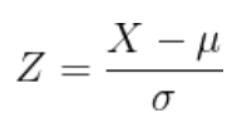

Onde μ é a média e σ é o desvio padrão da variável X.


Esta variável Z representa o afastamento em desvios padrões de um valor da variável original em relação à média.

## 11.) Prova de estatística

A aplicação de uma prova de estatística em um concurso apresentou um conjunto de notas normalmente distribuídas. Verificou-se que o conjunto de notas tinha média 70 e desvio padrão de 5 pontos.

Qual a probabilidade de um aluno, selecionado ao acaso, ter nota menor que 85?

Distribuição Normal

A distribuição normal é uma distribuição de probabilidade contínua que é simétrica em torno da média e tem uma forma de sino.

Parâmetros

- μ (média) = 70
- σ (desvio padrão) = 5
- X (nota do aluno) = 85

Cálculo

Para calcular a probabilidade de um aluno ter nota menor que 85, precisamos calcular a pontuação Z:

Z = (X - μ) / σ
= (85 - 70) / 5
= 15 / 5
= 3


In [8]:
from scipy.stats import norm

media = 70
desvio_padrao = 5
nota = 85

z = (nota - media) / desvio_padrao
probabilidade = norm.cdf(z)

print("Probabilidade =", probabilidade)

Probabilidade = 0.9986501019683699


Tabela Z

A tabela Z é uma tabela que fornece a probabilidade cumulativa para uma distribuição normal padrão (com média 0 e desvio padrão 1) até um determinado valor Z.

Valor Z Calculado

No nosso caso, o valor Z calculado é:

Z = (85 - 70) / 5
= 3

Tabela Z

Aqui está uma tabela Z parcial:

| Z | 0,00 | 0,01 | 0,02 | 0,03 | 0,04 | 0,05 | 0,06 | 0,07 | 0,08 | 0,09 |
| --- | --- | --- | --- | --- | --- | --- | --- | --- | --- | --- |
| 0,0 | 0,5000 | 0,5040 | 0,5080 | 0,5120 | 0,5160 | 0,5199 | 0,5239 | 0,5279 | 0,5319 | 0,5359 |
| 0,1 | 0,5398 | 0,5438 | 0,5478 | 0,5517 | 0,5557 | 0,5596 | 0,5636 | 0,5675 | 0,5714 | 0,5753 |
| 0,2 | 0,5793 | 0,5832 | 0,5871 | 0,5910 | 0,5948 | 0,5987 | 0,6026 | 0,6064 | 0,6103 | 0,6141 |
| 0,3 | 0,6179 | 0,6217 | 0,6255 | 0,6293 | 0,6331 | 0,6368 | 0,6406 | 0,6443 | 0,6480 | 0,6517 |
| ... | ... | ... | ... | ... | ... | ... | ... | ... | ... | ... |
| 2,9 | 0,9981 | 0,9982 | 0,9983 | 0,9984 | 0,9984 | 0,9985 | 0,9985 | 0,9986 | 0,9986 | 0,9987 |
| 3,0 | 0,9987 | 0,9987 | 0,9987 | 0,9988 | 0,9988 | 0,9989 | 0,9989 | 0,9989 | 0,9990 | 0,9990 |

Probabilidade

Para encontrar a probabilidade, procuramos o valor Z = 3,00 na tabela. Como o valor Z é exatamente 3,00, podemos ler a probabilidade diretamente da tabela:

P(Z ≤ 3,00) = 0,9987

Interpretação

A probabilidade de um aluno ter nota menor que 85 é aproximadamente 0,9987, ou 99,87%. Isso significa que aproximadamente 99,87% dos alunos terão nota menor que 85.

## 12.) Faturamento diário

O faturamento diário de um motorista de aplicativo segue uma distribuição aproximadamente normal, com média R$ 300,00 e desvio padrão igual a R$ 50,00. Obtenha as probabilidades de que, em um dia aleatório, o motorista ganhe:

1) Entre R$ 250,00 e R$ 350,00

2) Entre R$ 400,00 e R$ 500,00

Distribuição Normal

A distribuição normal é uma distribuição de probabilidade contínua que é simétrica em torno da média e tem uma forma de sino.

Parâmetros

- μ (média) = R$ 300,00
- σ (desvio padrão) = R$ 50,00

Cálculo das Probabilidades

1) Entre R$ 250,00 e R$ 350,00
- Z1 = (250 - 300) / 50 = -50 / 50 = -1
- Z2 = (350 - 300) / 50 = 50 / 50 = 1

Tabela Z ou Código em Python

Agora, podemos usar uma tabela Z ou o código em Python para calcular as probabilidades:


from scipy.stats import norm

media = 300
desvio_padrao = 50

z1 = (250 - media) / desvio_padrao
z2 = (350 - media) / desvio_padrao

probabilidade = norm.cdf(z2) - norm.cdf(z1)
print("Probabilidade =", probabilidade)


A função norm.cdf(z) calcula a probabilidade cumulativa até o valor Z.

Probabilidade

P(-1 ≤ Z ≤ 1) = P(Z ≤ 1) - P(Z ≤ -1)
= 0,8413 - 0,1587
= 0,6826

2) Entre R$ 400,00 e R$ 500,00
- Z1 = (400 - 300) / 50 = 100 / 50 = 2
- Z2 = (500 - 300) / 50 = 200 / 50 = 4

Código em Python


z1 = (400 - media) / desvio_padrao
z2 = (500 - media) / desvio_padrao

probabilidade = norm.cdf(z2) - norm.cdf(z1)
print("Probabilidade =", probabilidade)


Probabilidade

P(2 ≤ Z ≤ 4) = P(Z ≤ 4) - P(Z ≤ 2)
= 0,99997 - 0,9772
= 0,02277

Interpretação

- A probabilidade de o motorista ganhar entre R$ 250,00 e R$ 350,00 é aproximadamente 0,6826, ou 68,26%.
- A probabilidade de o motorista ganhar entre R$ 400,00 e R$ 500,00 é aproximadamente 0,02277, ou 2,28%. Isso significa que é muito improvável que o motorista ganhe mais de R$ 400,00 em um dia.

In [10]:
from scipy.stats import norm

media = 300
desvio_padrao = 50
Z_inferior = (250 - media) / desvio_padrao
Z_superior = (350 - media) / desvio_padrao

probabilidade = norm.cdf(Z_superior) - norm.cdf(Z_inferior)
print("{0:.2%}".format(probabilidade))

from scipy.stats import norm

media = 300
desvio_padrao = 50
Z_inferior = (400 - media) / desvio_padrao
Z_superior = (500 - media) / desvio_padrao

probabilidade = norm.cdf(Z_superior) - norm.cdf(Z_inferior)
print("{0:.2%}".format(probabilidade))

68.27%
2.27%


## 13.) Vida útil

O Inmetro verificou que as lâmpadas incandescentes da fabricante XPTO apresentam uma vida útil normalmente distribuída, com média igual a 720 dias e desvio padrão igual a 30 dias. Calcule a probabilidade de uma lâmpada, escolhida ao acaso, durar:

1) Entre 650 e 750 dias

2) Mais que 800 dias

3) Menos que 700 dias

In [11]:
from scipy.stats import norm

media = 720
desvio_padrao = 30

# Item A
Z_inferior = (650 - media) / desvio_padrao
Z_superior = (750 - media) / desvio_padrao

probabilidade = norm.cdf(Z_superior) - norm.cdf(Z_inferior)
print("{0:.2%}".format(probabilidade))

# Item B
Z = (800 - media) / desvio_padrao

probabilidade = 1 - norm.cdf(Z)
print("{0:.2%}".format(probabilidade))

# Item C
Z = (700 - media) / desvio_padrao

probabilidade = norm.cdf(Z)
print("{0:.2%}".format(probabilidade))

83.15%
0.38%
25.25%


## 14.) Obtendo probabilidades

Utilizando a tabela padronizada, ou o ferramental disponibilizado pelo Python, encontre a área sob a curva normal para os valores de Z abaixo:

1) Z < 1,96

2) Z > 2,15

3) Z < -0,78

4) Z > 0,59



In [12]:
from scipy.stats import norm

# Item A
probabilidade = norm.cdf(1.96)
print("{0:0.4f}".format(probabilidade))

# Item B
probabilidade = 1 - norm.cdf(2.15)
# ou -> probabilidade = norm.sf(2.15)
print("{0:0.4f}".format(probabilidade))

# Item C
probabilidade = norm.cdf(-0.78)
print("{0:0.4f}".format(probabilidade))

# Item D
probabilidade = 1 - norm.cdf(0.59)
# ou -> probabilidade = norm.sf(0.59)
print("{0:0.4f}".format(probabilidade))

0.9750
0.0158
0.2177
0.2776


## 15.) Um pouco de teoria

Sobre populações, avalie as afirmativas abaixo:

1) Quando os elementos de uma população puderem ser contados, porém apresentando uma quantidade muito grande, assume-se a população como infinita

2) Estudos envolvendo populações infinitas devem ser realizados com a utilização de amostras

3) Amostra é um subconjunto qualquer de uma população

Quais estão corretas?

Somente as afirmativas 1 e 2 estão corretas.


Amostras são subconjuntos representativos de uma população.

## 16.) Selecionando uma amostra

Considerando o exemplo visto em aula, marque a forma correta de obtermos uma amostra aleatória simples do nosso dataset dados.

Para este problema, considere que queremos uma amostra de tamanho 1000.

amostra = dados.sample(1000)

Perfeito, na aula utilizamos o parâmetro random_state, que é a semente para o gerador de números aleatórios (utilize caso queira repetir o processo e manter a mesma amostra selecionada)

Amostra Aleatória Simples

Para obter uma amostra aleatória simples do dataset dados com tamanho 1000, você pode usar a função sample() do pandas:


amostra = dados.sample(n=1000)


Essa função seleciona aleatoriamente 1000 linhas do dataset dados e retorna uma nova DataFrame com essas linhas.

Observação

Certifique-se de que o tamanho da amostra (n=1000) não exceda o tamanho do dataset original. Se o dataset tiver menos de 1000 linhas, você precisará ajustar o tamanho da amostra ou usar uma abordagem diferente. Além disso, se você quiser garantir que a amostra seja reprodutível, pode usar o parâmetro random_state:


<font color=red>amostra = dados.sample(n=1000, random_state=42)</font>

## 17. Mais um pouco de teoria

Avalie as alternativas abaixo e marque as corretas.




  - A exigência fundamental de um processo de amostragem aleatória simples é que cada elemento da população tenha as mesmas chances de ser selecionado para fazer parte da amostra.


Utilizando o pandas, podemos fazer a seleção de uma amostra aleatória simples com o método sample( ) do pandas DataFrame

   - Na amostragem por conglomerados, os subgrupos separados da população não precisam ser homogêneos.


Um exemplo bastante comum de aplicação deste tipo de técnica é na divisão da população em grupos territoriais, onde os elementos investigados terão características bastante variadas

## 18.) Conceitos sobre estimação

Em nossa última aula, conhecemos o Teorema do Limite Central e, a partir de um exemplo, entendemos cada ponto de seu enunciado.

Avalie as alternativas abaixo e marque aquela com o enunciado correto do teorema que aprendemos.

O Teorema do Limite Central afirma que, com o aumento do tamanho da amostra, a distribuição das médias amostrais se aproxima de uma distribuição normal, com média igual à média da população, e desvio padrão igual ao desvio padrão da variável original dividido pela raiz quadrada do tamanho da amostra. Este fato é assegurado para n maior ou igual a 30.


Exatamente como apresentado em nosso notebook de estudo. Altere os tamanhos de amostra e variáveis selecionadas para verificar a validade do teorema em outros cenários

## 19. ) Sobre os níveis de confiança e significância

Sobre os níveis de confiança e significância, avalie as afirmativas abaixo:

1) O nível de confiança (1 - α) representa a probabilidade de acerto da estimativa. De forma complementar, o nível de significância (α) expressa a probabilidade de erro da estimativa

2) O nível de confiança representa o grau de confiabilidade do resultado da estimativa estar dentro de determinado intervalo

3) O nível de confiança de uma estimativa pode ser obtido a partir da área sob a curva normal, como ilustrado na figura abaixo:

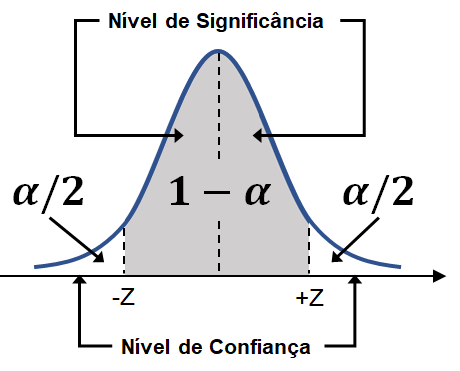

Somente as afirmativas 1 e 2 estão corretas.

O nível de confiança de uma estimativa pode ser obtido a partir da área sob a curva normal, como ilustrado na figura acima:

## 20). Margem de erro

Para estimar o valor médio gasto por cada cliente de uma grande rede de fast-food, foi selecionada uma amostra de 50 clientes.

Assumindo que o valor do desvio padrão da população seja de R$ 6,00 e que esta população se distribui normalmente, obtenha a margem de erro desta estimativa para um nível de confiança de 95%.



Margem de Erro

A margem de erro é calculada usando a fórmula:

Margem de Erro = Z * (σ / √n)

Onde:

- Z é o valor Z correspondente ao nível de confiança desejado
- σ é o desvio padrão da população
- n é o tamanho da amostra

Cálculo

- Nível de confiança = 95%
- Z = 1,96 (para um nível de confiança de 95%)
- σ = R$ 6,00
- n = 50

Margem de Erro = 1,96 * (6 / √50)
= 1,96 * (6 / 7,071)
= 1,96 * 0,848
= 1,66

Resposta

A margem de erro é de aproximadamente R$ 1,66.


In [13]:
import math
from scipy.stats import norm

desvio_padrao = 6
tamanho_amostra = 50
nivel_confianca = 0.95

z = norm.ppf(1 - (1 - nivel_confianca) / 2)
margem_erro = z * (desvio_padrao / math.sqrt(tamanho_amostra))

print("Margem de Erro =", margem_erro)


Margem de Erro = 1.6630845892196133


## 21.) Intervalo de confiança

Uma amostra aleatória simples de 1976 itens de uma população normalmente distribuída, com desvio padrão populacional igual a 11, resultou em uma média amostral de 28.

Qual o intervalo de confiança de 90% para a média populacional?

In [14]:
from scipy.stats import norm
import numpy as np

media_amostral = 28
desvio_padrao = 11
n = 1976

norm.interval(confidence = 0.90,
                loc = media_amostral,
                scale = desvio_padrao / np.sqrt(n))

(np.float64(27.592969951356466), np.float64(28.407030048643534))

## 22.) Obtendo o tamanho da amostra

O valor do gasto médio dos clientes de uma loja de conveniência é de R$ 45,50. Assumindo que o desvio padrão dos gastos é igual a R$ 15,00, qual deve ser o tamanho da amostra para estimarmos a média populacional com um nível de significância de 10%?

Considere que o erro máximo aceitável seja de 10%.

Tamanho da Amostra

O tamanho da amostra é calculado usando a fórmula:

n = (Z^2 * σ^2) / E^2

Onde:

- Z é o valor Z correspondente ao nível de confiança desejado (ou nível de significância)
- σ é o desvio padrão da população
- E é o erro máximo aceitável

Cálculo

- Nível de significância = 10% => Nível de confiança = 90%
- Z = 1,645 (para um nível de confiança de 90%)
- σ = R$ 15,00
- E = 10% de R$ 45,50 = 0,1 * 45,50 = R$ 4,55

n = (1,6449^2 * 15^2) / (0,1 * 45,5)^2
= (2,7055 * 225) / 20,7025
= 608,7375 / 20,7025
≈ 29,39


In [15]:
from scipy.stats import norm

media = 45.5
sigma = 15
significancia = 0.10
confianca = 1 - significancia

z = norm.ppf(0.5 + (confianca / 2))
erro_percentual = 0.10
e = media * erro_percentual

n = (z * (sigma / e)) ** 2
n.round()

np.float64(29.0)

## 23.) Amostra de sacos de farinha

Um fabricante de farinha verificou que, em uma amostra aleatória formada por 200 sacos de 25 kg de um lote formado por 2.000 sacos, apresentou um desvio padrão amostral do peso igual a 480 g.

Considerando um erro máximo associado à média populacional igual a 0,3 kg e um nível de confiança igual a 95%, qual tamanho de amostra deveria ser selecionado para obtermos uma estimativa confiável do parâmetro populacional?

In [16]:
from scipy.stats import norm

N = 2000
z = norm.ppf(0.5 + (0.95 / 2))
s = 480
e = 0.3 * 1000   # Convertendo kg para g

n = ((z**2) * (s**2) * (N)) / (((z**2) * (s**2)) + ((e**2) * (N - 1)))
int(n.round())

10

## 24.) Tamanho de amostra

Assinale a alternativa que apresenta a forma correta de obter o tamanho de uma amostra quando os dados são quantitativos, o desvio padrão populacional é conhecido e a população é infinita.

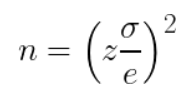

Lembrando que o desvio padrão e o erro devem estar na mesma unidade de medida

## 25.) Revisando o conteúdo

Avalie as afirmativas abaixo:

1) Um evento binomial é caracterizado pela possibilidade de ocorrência de apenas duas categorias. Estas categorias somadas representam todo o espaço amostral, sendo também mutuamente excludentes, ou seja, a ocorrência de uma implica na não ocorrência da outra

2) A distribuição Poisson é empregada para descrever o número de ocorrências em um intervalo de tempo ou espaço específico. Os eventos são caracterizados pela possibilidade de contagem dos sucessos, mas a não possibilidade de contagem dos fracassos

3) A distribuição normal é uma distribuição contínua e é assimétrica em relação a sua média

Quais estão corretas?

Somente as afirmativas 1 e 2 estão corretas.


A distribuição normal é simétrica em relação a sua média

## 26.) Revisando o conteúdo um pouco mais

Avalie as afirmativas abaixo:

1) Os atributos numéricos de uma população como sua média, variância e desvio padrão, são conhecidos como parâmetros. O principal foco da inferência estatística é justamente gerar estimativas e testar hipóteses sobre os parâmetros populacionais utilizando as informações de amostras

2) O Teorema do Limite Central afirma que, com o aumento do tamanho da amostra, a distribuição das médias amostrais se aproxima de uma distribuição normal, com média igual à média da população, e desvio padrão igual ao desvio padrão da variável original dividido pela raiz quadrada do tamanho da amostra. Este fato é assegurado para n menor ou igual a 30

3) O erro inferencial é definido pelo desvio padrão das médias amostrais e pelo nível de confiança determinado para o processo:

Fórmula do erro inferencial definido como z multiplicado pelo desvio amostral (desvio padrão populacional dividido pela raiz do número de amostras da população.

Quais afirmativas estão corretas?

Somente as afirmativas 1 e 3 estão corretas.


O erro inferencial também é conhecido como a margem de erro)